In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA = Path("../data")
FIGS = Path("../reports/figures")

In [3]:
a = np.array([1, 2, 3, 4])

In [4]:
print(a*2)

[2 4 6 8]


In [5]:
print(a + 5)

[6 7 8 9]


In [6]:
print(a.mean(), a.std())

2.5 1.118033988749895


In [7]:
m = np.array([[1, 2, 3], [4, 5, 6]])

In [8]:
print(m.shape)

(2, 3)


In [9]:
print(m[:, 1])

[2 5]


In [10]:
print(m[0, :])

[1 2 3]


In [12]:
BASE_TO_INT = {"A":0, "C":1, "G":2, "T":3}

def seq_to_int(seq):
    seq = seq.upper()
    return np.array([BASE_TO_INT.get(b, -1) for b in seq], dtype=np.int8)

print(seq_to_int("ACGTACGTA"))

[0 1 2 3 0 1 2 3 0]


In [22]:
def one_hot_encode(seq):
    seq_arr = seq_to_int(seq)
    oh = np.zeros((len(seq_arr), 4), dtype=np.float32)
    for i, b in enumerate(seq_arr):
        if b != -1:
            oh[i, b] = 1.0
    return oh

# Test
one_hot_encode("ACGTAC")

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

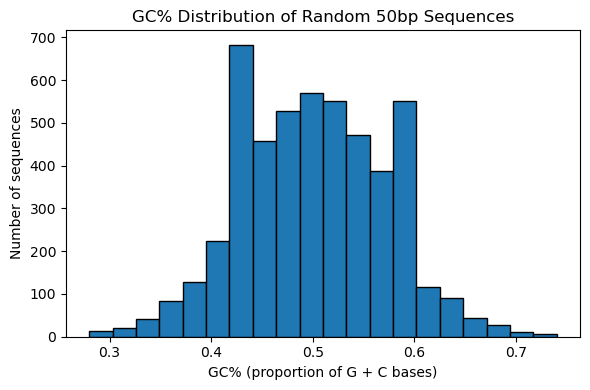

In [36]:
alphabet = np.array(list("ACGT"))

def random_seq(n=50):
    return "".join(np.random.choice(alphabet, size = n))

seqs = [random_seq(50) for _ in range (5000)]
gc = [ (s.count("G") + s.count("C")) / len(s) for s in seqs ]

plt.figure(figsize= (6,4))
plt.hist(gc, bins=20, edgecolor ="black")
plt.xlabel("GC% (proportion of G + C bases)")
plt.ylabel("Number of sequences")
plt.title("GC% Distribution of Random 50bp Sequences")
plt.tight_layout()
plt.savefig(FIGS/"gc_random_50bp.png", dpi=200)
plt.show()

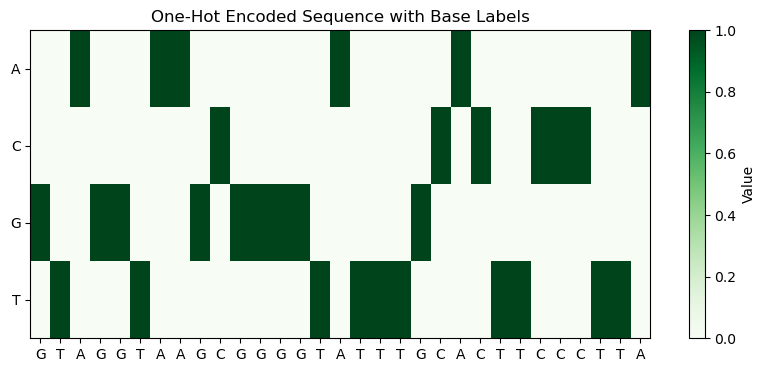

In [54]:
merged = pd.read_csv(DATA/"fake_variants_merged.csv")

#one-hot encode column seq31
merged["oh_seq31"] = merged["seq31"].apply(one_hot_encode)

#visualise shape of one example
seq = merged["seq31"].iloc[0]
example = merged["oh_seq31"].iloc[0]
plt.figure(figsize=(10,4))
plt.imshow(example.T, aspect="auto", cmap="Greens")
plt.xticks(range(len(seq)), list(seq))
plt.yticks(range(4), ["A","C","G","T"])
plt.title("One-Hot Encoded Sequence with Base Labels")
plt.colorbar(label="Value")
plt.savefig(FIGS/"one_shot_encoded_seq_with_base_labels.png", dpi=200)
plt.show()